In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('car_details.csv')

In [3]:
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


# Data Cleaning

In [4]:
df.dropna(subset=["Engine", "Max Power", "Max Torque", "Drivetrain", "Seating Capacity", "Fuel Tank Capacity"], inplace = True)

In [5]:
df.isna().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

In [6]:
import re

def extract_base_model(model_str):
    # Removing [year ranges] or any brackets
    model_str = re.sub(r'\[.*?\]', '', model_str)
    # Strip leading/trailing whitespace
    model_str = model_str.strip()
    # Split into words
    words = model_str.split()
    # Return first 2 words as base model (adjustable)
    return ' '.join(words[:2]) if len(words) >= 2 else words[0]

df['Base Model'] = df['Model'].apply(extract_base_model)
df['Base Model'] = df['Base Model'].str.title().str.strip()
df.drop("Model",axis=1)

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Base Model
0,Honda,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,Amaze 1.2
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,Swift Dzire
2,Hyundai,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,I10 Magna
3,Toyota,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,Glanza G
4,Toyota,1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,Innova 2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,Maruti Suzuki,245000,2014,79000,Petrol,Manual,Faridabad,White,Second,Individual,1197 cc,85 bhp @ 6000 rpm,113 Nm @ 4500 rpm,FWD,3775.0,1680.0,1620.0,5.0,43.0,Ritz Vxi
2054,Mahindra,850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0,Xuv500 W8
2055,Hyundai,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0,Eon D-Lite
2056,Ford,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0,Figo Duratec


# FEATURE CREATION

In [7]:
df['Car Age']=2025 - df['Year']

In [8]:
def age_segment(Age):
    if 0 <= Age <= 6:
        return 'New'
    elif 7 <= Age <= 11:
        return 'Mid-Age'
    elif 12 <= Age <= 16:
        return 'Old'
    else:
        return 'Not for Re-Sale'

df['Age Segment'] = df['Car Age'].apply(age_segment)

In [9]:
df['Age Segment'].unique()

array(['Mid-Age', 'Old', 'New', 'Not for Re-Sale'], dtype=object)

In [10]:
def price_segment(price):
    if price < 100000:
        return 'Very Low'
    elif 100000 <= price <= 5000000:
        return 'Low to Mid Range'
    elif 5100000 <= price <= 10000000:
        return 'High Range'
    else:
        return 'Luxury'

df['Price Segment'] = df['Price'].apply(price_segment)

print(df['Price Segment'].value_counts())

Price Segment
Low to Mid Range    1739
High Range           113
Luxury                21
Very Low               1
Name: count, dtype: int64


In [11]:
df.drop(df[df['Owner'] == 'UnRegistered Car'].index, inplace=True)

In [12]:
df.rename(columns={"Make":"Company"},inplace=True)

In [13]:
df

,Company,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Base Model,Car Age,Age Segment,Price Segment
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,FWD,3990.0,1680.0,1505.0,5.0,35.0,Amaze 1.2,8,Mid-Age,Low to Mid Range
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,FWD,3995.0,1695.0,1555.0,5.0,42.0,Swift Dzire,11,Mid-Age,Low to Mid Range
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,FWD,3585.0,1595.0,1550.0,5.0,35.0,I10 Magna,14,Old,Low to Mid Range
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,FWD,3995.0,1745.0,1510.0,5.0,37.0,Glanza G,6,New,Low to Mid Range
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,RWD,4735.0,1830.0,1795.0,7.0,55.0,Innova 2.4,7,Mid-Age,Low to Mid Range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,Maruti Suzuki,Ritz Vxi (ABS) BS-IV,245000,2014,79000,Petrol,Manual,Faridabad,White,Second,...,FWD,3775.0,1680.0,1620.0,5.0,43.0,Ritz Vxi,11,Mid-Age,Low to Mid Range
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,...,FWD,4585.0,1890.0,1785.0,7.0,70.0,Xuv500 W8,9,Mid-Age,Low to Mid Range
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,...,FWD,3495.0,1550.0,1500.0,5.0,32.0,Eon D-Lite,11,Mid-Age,Low to Mid Range
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,...,FWD,3795.0,1680.0,1427.0,5.0,45.0,Figo Duratec,12,Old,Low to Mid Range


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1856 entries, 0 to 2057
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1856 non-null   object 
 1   Model               1856 non-null   object 
 2   Price               1856 non-null   int64  
 3   Year                1856 non-null   int64  
 4   Kilometer           1856 non-null   int64  
 5   Fuel Type           1856 non-null   object 
 6   Transmission        1856 non-null   object 
 7   Location            1856 non-null   object 
 8   Color               1856 non-null   object 
 9   Owner               1856 non-null   object 
 10  Seller Type         1856 non-null   object 
 11  Engine              1856 non-null   object 
 12  Max Power           1856 non-null   object 
 13  Max Torque          1856 non-null   object 
 14  Drivetrain          1856 non-null   object 
 15  Length              1856 non-null   float64
 16  Width      

In [15]:
df['Fuel Type'] = df['Fuel Type'].replace({
    'CNG + CNG': 'CNG',
    'Petrol + CNG': 'Petrol+CNG'
})

In [16]:
df['Fuel Type'].value_counts()

Fuel Type
Diesel        946
Petrol        856
CNG            46
LPG             4
Hybrid          3
Petrol+CNG      1
Name: count, dtype: int64

# DATA VISUALIZATION

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
#sns.violinplot(y=df['Price'])

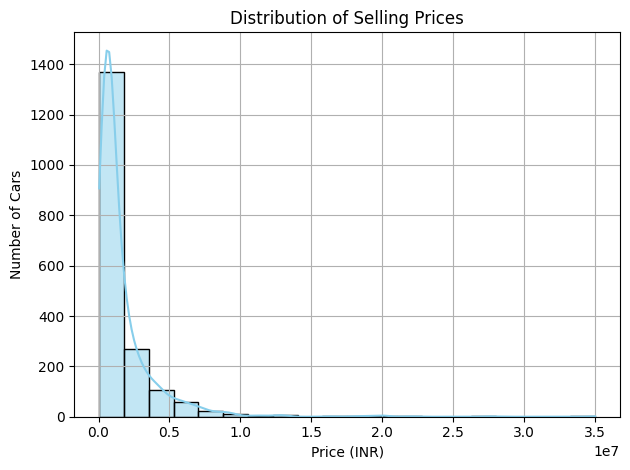

In [19]:
sns.histplot(df['Price'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Selling Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.tight_layout()
plt.show()

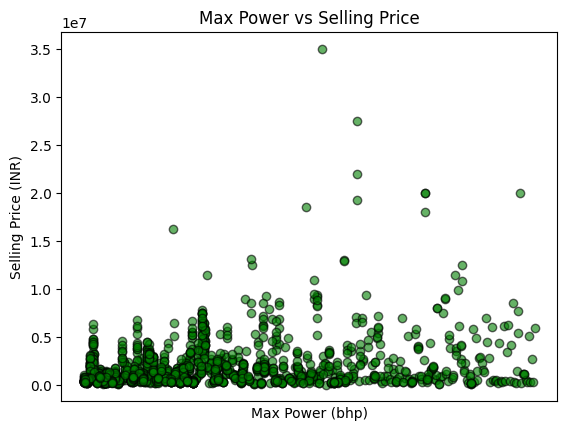

In [20]:
plt.scatter(df['Max Power'], df['Price'], alpha=0.6, color='green', edgecolor='black')
plt.title('Max Power vs Selling Price')
plt.xlabel('Max Power (bhp)')
plt.ylabel('Selling Price (INR)')
plt.xticks([])
plt.show()

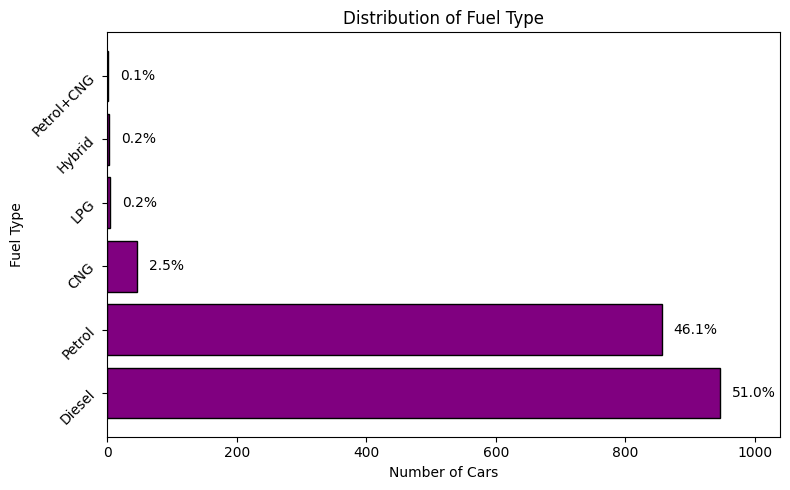

In [21]:
import matplotlib.pyplot as plt

fuel_counts = df['Fuel Type'].value_counts()
total = fuel_counts.sum()

plt.figure(figsize=(8, 5))
bars = plt.barh(fuel_counts.index, fuel_counts.values, color='purple', edgecolor='black')

plt.xlim(0, max(fuel_counts.values) + total * 0.05)

for bar in bars:
    width = bar.get_width()
    pct = (width / total) * 100
    plt.text(
        width + total * 0.01,
        bar.get_y() + bar.get_height() / 2,
        f'{pct:.1f}%',
        va='center',
        fontsize=10
    )

plt.title("Distribution of Fuel Type")
plt.xlabel("Number of Cars")
plt.ylabel("Fuel Type")

plt.yticks(rotation=45)

plt.tight_layout()
plt.show()

C:\Users\gunme\AppData\Local\Temp\ipykernel_11948\2154341438.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Seating Capacity", y="Price_Millions", data=df_copy, palette="Set2")


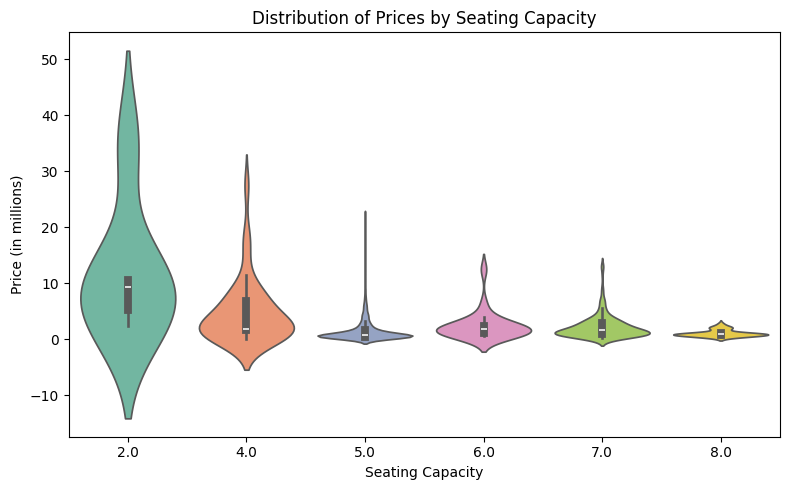

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy so original df remains untouched
df_copy = df.copy()
df_copy["Price_Millions"] = df_copy["Price"] / 1e6  # Convert to millions

plt.figure(figsize=(8, 5))
sns.violinplot(x="Seating Capacity", y="Price_Millions", data=df_copy, palette="Set2")

plt.title("Distribution of Prices by Seating Capacity")
plt.xlabel("Seating Capacity")
plt.ylabel("Price (in millions)")
plt.tight_layout()
plt.show()


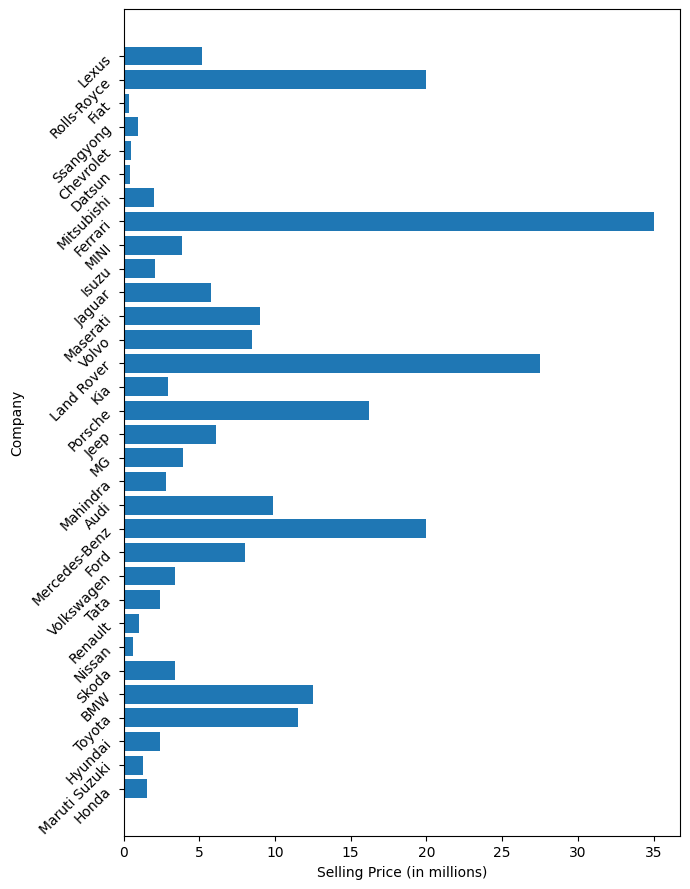

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 9))

# Divide price values by 1e6
plt.barh(df["Company"], df["Price"] / 1e6)

plt.xlabel("Selling Price (in millions)")
plt.ylabel("Company")
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


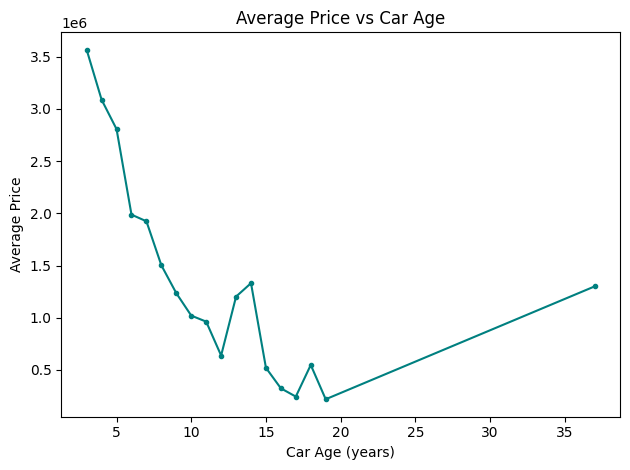

In [24]:
age_price = df.groupby('Car Age')['Price'].mean().sort_index()
plt.plot(age_price.index, age_price.values, marker='.', color='teal')
plt.title('Average Price vs Car Age')
plt.xlabel('Car Age (years)')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

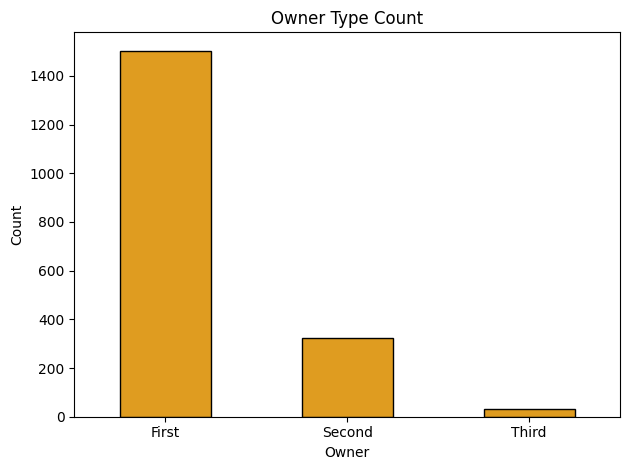

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.figure(figsize=(8, 5))

sns.countplot(data=df, x='Owner', color='orange', width=0.5, edgecolor='black')

plt.title('Owner Type Count')
plt.xlabel('Owner')
plt.ylabel('Count')
# plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

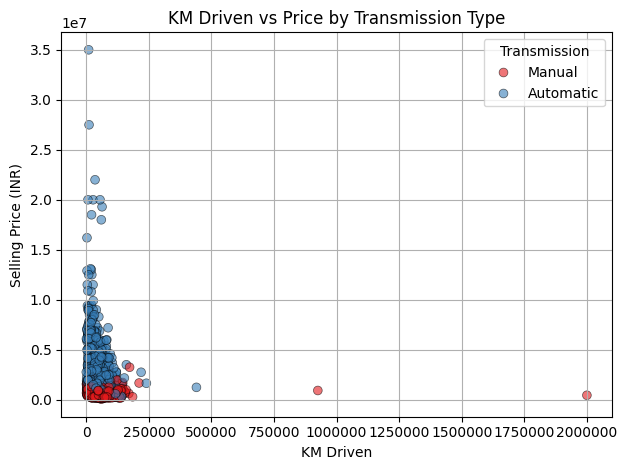

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example filter (replace with your actual filtering logic)
df_filtered = df.copy()

scatter = sns.scatterplot(
    x='Kilometer',
    y='Price',
    hue='Transmission',
    data=df_filtered,
    palette='Set1',
    alpha=0.6,
    edgecolor='black',
    s=40
)

plt.title('KM Driven vs Price by Transmission Type')
plt.xlabel('KM Driven')
plt.ylabel('Selling Price (INR)')
plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='x')  # Disable scientific notation
plt.grid(True)
plt.legend(title='Transmission')
plt.tight_layout()
plt.show()


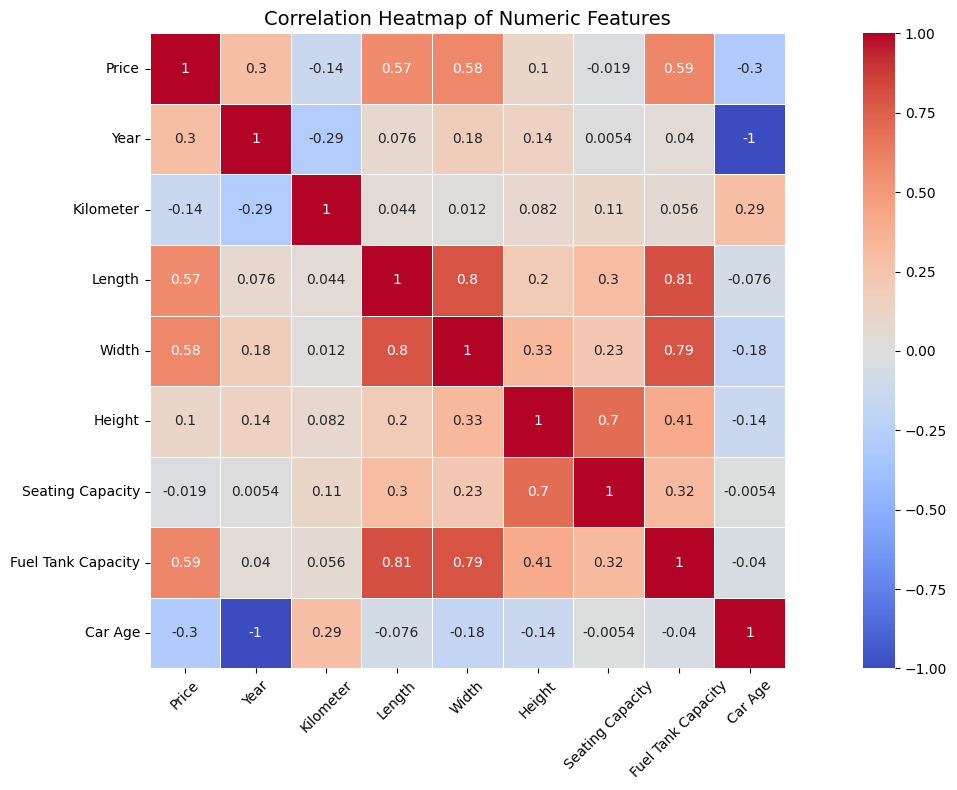

In [27]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5, cbar=True, square=True)         
plt.title("Correlation Heatmap of Numeric Features", fontsize=14) 
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\gunme\AppData\Local\Temp\ipykernel_11948\1670460867.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_price = df.groupby('Age Segment')['Price'].mean().sort_index()
C:\Users\gunme\AppData\Local\Temp\ipykernel_11948\1670460867.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_price.index, y=age_price.values, palette='muted', edgecolor='black', width=0.5)


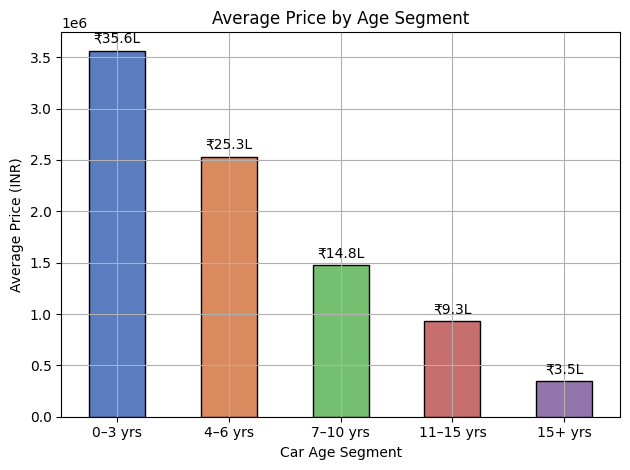

In [28]:
bins = [0, 3, 6, 10, 15, df['Car Age'].max()]
labels = ['0–3 yrs', '4–6 yrs', '7–10 yrs', '11–15 yrs', '15+ yrs']
df['Age Segment'] = pd.cut(df['Car Age'], bins=bins, labels=labels)
age_price = df.groupby('Age Segment')['Price'].mean().sort_index()
sns.barplot(x=age_price.index, y=age_price.values, palette='muted', edgecolor='black', width=0.5)

for i, val in enumerate(age_price.values):
    plt.text(i, val + 50000, f"₹{val/1e5:.1f}L", ha='center', va='bottom', fontsize=10)

plt.title("Average Price by Age Segment")
plt.xlabel("Car Age Segment")
plt.ylabel("Average Price (INR)")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\gunme\AppData\Local\Temp\ipykernel_11948\1530675075.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Company', y='Price', data=top10, edgecolor='black', palette='Set3')


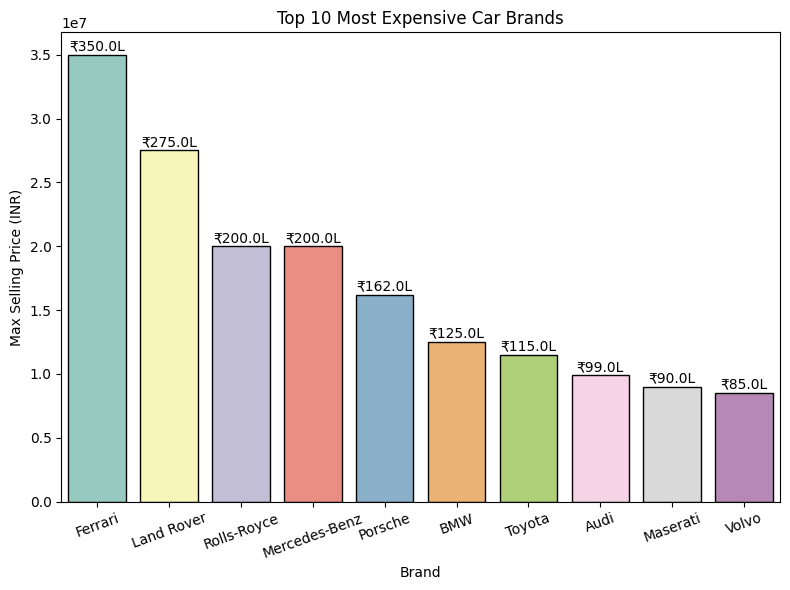

In [29]:
top10= df.groupby('Company')['Price'].max().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Company', y='Price', data=top10, edgecolor='black', palette='Set3') 
for i, row in top10.iterrows():
    ax.text(i, row['Price'] + 100000, f"₹{row['Price']/1e5:.1f}L", ha='center', va='bottom', fontsize=10)

plt.title("Top 10 Most Expensive Car Brands")
plt.xlabel("Brand")
plt.ylabel("Max Selling Price (INR)")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# ENCODING


In [30]:
df['Engine CC']=df['Engine'].str.split().str[0].astype(int)
df.drop('Engine',axis=1,inplace=True)

In [31]:
df['max_power_cleaned'] = df['Max Power'].str.extract(r'(\d+\.?\d*)')
df['max_power_cleaned'] = pd.to_numeric(df['max_power_cleaned'], errors='coerce')

df['torque_value'] = df['Max Torque'].str.extract(r'(\d+\.?\d*)')
df['is_kgm'] = df['Max Torque'].str.contains('kgm', case=False, na=False)
df['torque_value'] = pd.to_numeric(df['torque_value'], errors='coerce')
df['torque_value'] = np.where(df['is_kgm'], df['torque_value'] * 9.8, df['torque_value'])
df['Max Torque'] = df['torque_value']
df.drop(columns=['torque_value', 'is_kgm'], inplace=True)


df = df.drop(columns=['Max Power'])
df.rename(columns={
   'max_power_cleaned': 'Max Power',
    'torque_nm': 'Max Torque'
    },inplace=True)

In [32]:
df.isna().sum()

Company               0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
Base Model            0
Car Age               0
Age Segment           0
Price Segment         0
Engine CC             0
Max Power             0
dtype: int64

In [33]:
owner_map = {
    'First': 1,
    'Second': 2,
    'Third': 3
}
df['Owner'] = df['Owner'].map(owner_map)

trans_map = {
    'Manual': 1,
    'Automatic': 2
}
df['Transmission'] = df['Transmission'].map(trans_map)

fuel_dummies = pd.get_dummies(df['Fuel Type'], prefix='Fuel', drop_first=True, dtype=int)
df = pd.concat([df.drop('Fuel Type', axis=1), fuel_dummies], axis=1)

In [34]:
df

,Company,Model,Price,Year,Kilometer,Transmission,Location,Color,Owner,Seller Type,...,Car Age,Age Segment,Price Segment,Engine CC,Max Power,Fuel_Diesel,Fuel_Hybrid,Fuel_LPG,Fuel_Petrol,Fuel_Petrol+CNG
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,1,Pune,Grey,1,Corporate,...,8,7–10 yrs,Low to Mid Range,1198,87.0,0,0,0,1,0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,1,Ludhiana,White,2,Individual,...,11,11–15 yrs,Low to Mid Range,1248,74.0,1,0,0,0,0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,1,Lucknow,Maroon,1,Individual,...,14,11–15 yrs,Low to Mid Range,1197,79.0,0,0,0,1,0
3,Toyota,Glanza G,799000,2019,37500,1,Mangalore,Red,1,Individual,...,6,4–6 yrs,Low to Mid Range,1197,82.0,0,0,0,1,0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,1,Mumbai,Grey,1,Individual,...,7,7–10 yrs,Low to Mid Range,2393,148.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,Maruti Suzuki,Ritz Vxi (ABS) BS-IV,245000,2014,79000,1,Faridabad,White,2,Individual,...,11,11–15 yrs,Low to Mid Range,1197,85.0,0,0,0,1,0
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,1,Surat,White,1,Individual,...,9,7–10 yrs,Low to Mid Range,2179,138.0,1,0,0,0,0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,1,Ahmedabad,White,2,Individual,...,11,11–15 yrs,Low to Mid Range,814,55.0,0,0,0,1,0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,1,Thane,Silver,1,Individual,...,12,11–15 yrs,Low to Mid Range,1196,70.0,0,0,0,1,0


In [35]:
df.drop("Year",axis=1)

,Company,Model,Price,Kilometer,Transmission,Location,Color,Owner,Seller Type,Max Torque,...,Car Age,Age Segment,Price Segment,Engine CC,Max Power,Fuel_Diesel,Fuel_Hybrid,Fuel_LPG,Fuel_Petrol,Fuel_Petrol+CNG
0,Honda,Amaze 1.2 VX i-VTEC,505000,87150,1,Pune,Grey,1,Corporate,109.0000,...,8,7–10 yrs,Low to Mid Range,1198,87.0,0,0,0,1,0
1,Maruti Suzuki,Swift DZire VDI,450000,75000,1,Ludhiana,White,2,Individual,190.0000,...,11,11–15 yrs,Low to Mid Range,1248,74.0,1,0,0,0,0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,67000,1,Lucknow,Maroon,1,Individual,112.7619,...,14,11–15 yrs,Low to Mid Range,1197,79.0,0,0,0,1,0
3,Toyota,Glanza G,799000,37500,1,Mangalore,Red,1,Individual,113.0000,...,6,4–6 yrs,Low to Mid Range,1197,82.0,0,0,0,1,0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,69000,1,Mumbai,Grey,1,Individual,343.0000,...,7,7–10 yrs,Low to Mid Range,2393,148.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,Maruti Suzuki,Ritz Vxi (ABS) BS-IV,245000,79000,1,Faridabad,White,2,Individual,113.0000,...,11,11–15 yrs,Low to Mid Range,1197,85.0,0,0,0,1,0
2054,Mahindra,XUV500 W8 [2015-2017],850000,90300,1,Surat,White,1,Individual,330.0000,...,9,7–10 yrs,Low to Mid Range,2179,138.0,1,0,0,0,0
2055,Hyundai,Eon D-Lite +,275000,83000,1,Ahmedabad,White,2,Individual,75.0000,...,11,11–15 yrs,Low to Mid Range,814,55.0,0,0,0,1,0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,73000,1,Thane,Silver,1,Individual,102.0000,...,12,11–15 yrs,Low to Mid Range,1196,70.0,0,0,0,1,0


In [36]:
df["Car Age"].unique()

array([ 8, 11, 14,  6,  7, 10,  9,  5, 12, 16, 15,  4, 13, 19,  3, 18, 17,
       37])

In [37]:
df.drop(df[df["Car Age"]==37].index,inplace=True)

In [38]:
df["Car Age"].unique()

array([ 8, 11, 14,  6,  7, 10,  9,  5, 12, 16, 15,  4, 13, 19,  3, 18, 17])

In [39]:
df.reset_index(drop=True, inplace=True)

In [40]:
df.to_csv("cleaned_cars.csv")

# Price Prediction

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the features
features = [
    'Car Age', 'Kilometer', 'Fuel_Diesel', 'Fuel_Hybrid', 'Fuel_LPG', 'Fuel_Petrol', 'Fuel_Petrol+CNG', 'Transmission', 'Owner', 'Seating Capacity',
    'Engine CC', 'Max Power', 'Fuel Tank Capacity' 
]

# Encode categorical columns
# df['Transmission'] = df['Transmission'].astype('category').cat.codes
# df['Owner'] = df['Owner'].astype('category').cat.codes

# Prepare data
X = df[features]
y = df['Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(
    n_estimators=200,             # More trees → better performance
    random_state=42,
)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate and print in requested order
print("MAE:", round(mean_absolute_error(y_test, y_pred), 2))
print("MSE:", round(mean_squared_error(y_test, y_pred), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
print("R² Score:", round(r2_score(y_test, y_pred), 2))

MAE: 352060.31
MSE: 737193569026.58
RMSE: 858599.77
R² Score: 0.87


In [44]:
import joblib

# After training
joblib.dump(model, 'car_price_model.pkl')

['car_price_model.pkl']